In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
df = pd.read_csv('insurance.csv')

In [ ]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
import plotly.express as px
import pandas as pd


fig = px.pie(df, names='smoker', title='Distribution of Smokers and Non-Smokers',)

fig.show()


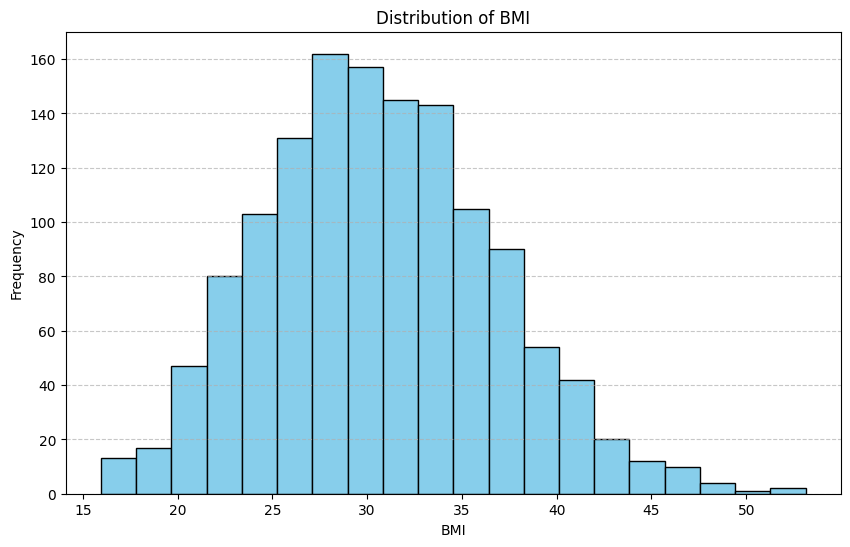

In [ ]:
import matplotlib.pyplot as plt



# Plot the histogram for 'bmi'
plt.figure(figsize=(10, 6))
plt.hist(df['bmi'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of BMI')
plt.xlabel('BMI')
plt.ylabel('Frequency')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


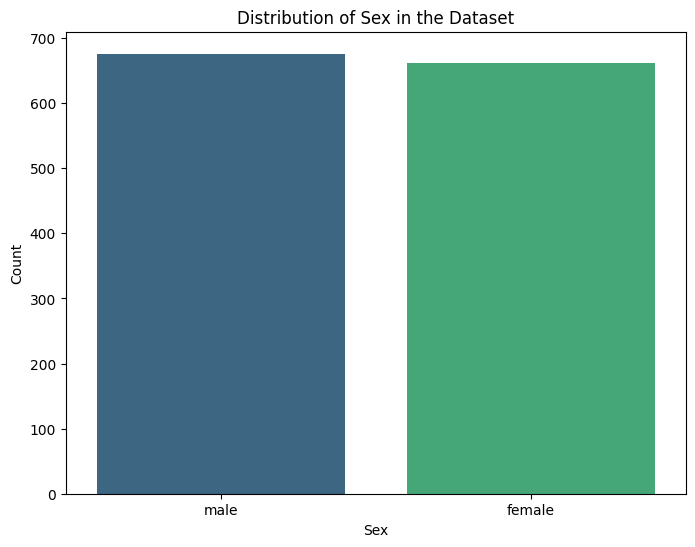

In [ ]:
# Count the unique values in the 'sex' column
sex_counts = df['sex'].value_counts()

# Plot a bar chart
plt.figure(figsize=(8, 6))
sns.barplot(x=sex_counts.index, y=sex_counts.values, palette='viridis')
plt.title('Distribution of Sex in the Dataset')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()



<ipython-input-64-d3f870a6580d>:3: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




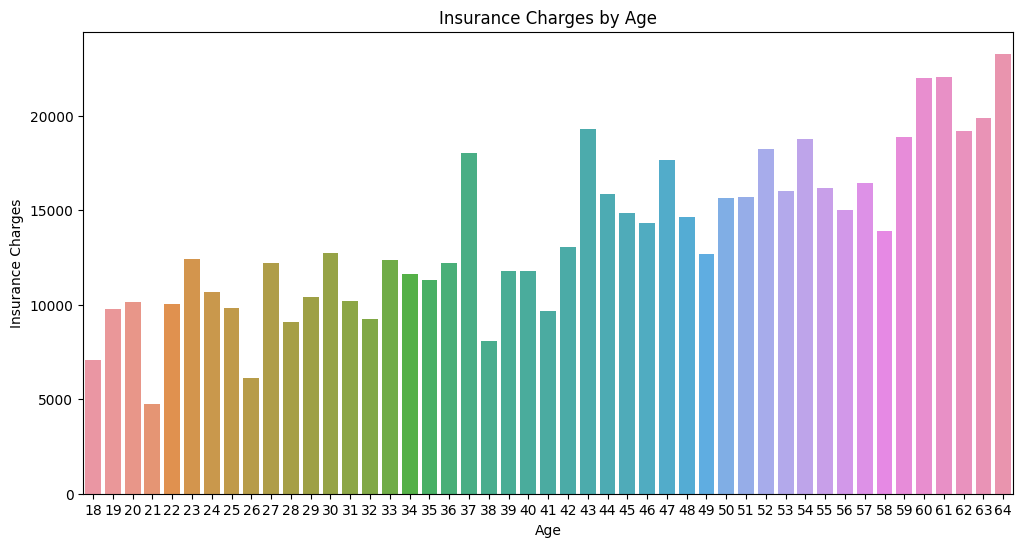

In [ ]:
# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='age', y='charges', data=df, ci=None)
plt.title('Insurance Charges by Age')
plt.xlabel('Age')
plt.ylabel('Insurance Charges')
plt.show()


In [ ]:
# Data preprocessing
X = df.drop('charges', axis=1)
y = df['charges']

In [ ]:
# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['sex', 'smoker', 'region'], drop_first=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)

In [ ]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# Add a constant term to the features (required for statsmodels)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

In [ ]:

# Fit the linear regression model using ordinary least squares (OLS)
model = sm.OLS(y_train, X_train_scaled).fit()

In [ ]:
# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

In [ ]:
# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

In [ ]:
# Display the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.785
Model:                            OLS   Adj. R-squared:                  0.771
Method:                 Least Squares   F-statistic:                     56.63
Date:                Tue, 14 Nov 2023   Prob (F-statistic):           8.47e-38
Time:                        09:25:32   Log-Likelihood:                -1332.0
No. Observations:                 133   AIC:                             2682.
Df Residuals:                     124   BIC:                             2708.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.218e+04    485.787     25.069      0.0

In [ ]:
# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Mean Absolute Error: 4279.709799222019
Mean Squared Error: 38516525.564827695
Root Mean Squared Error: 6206.168348089479
R-squared: 0.7389431489232599


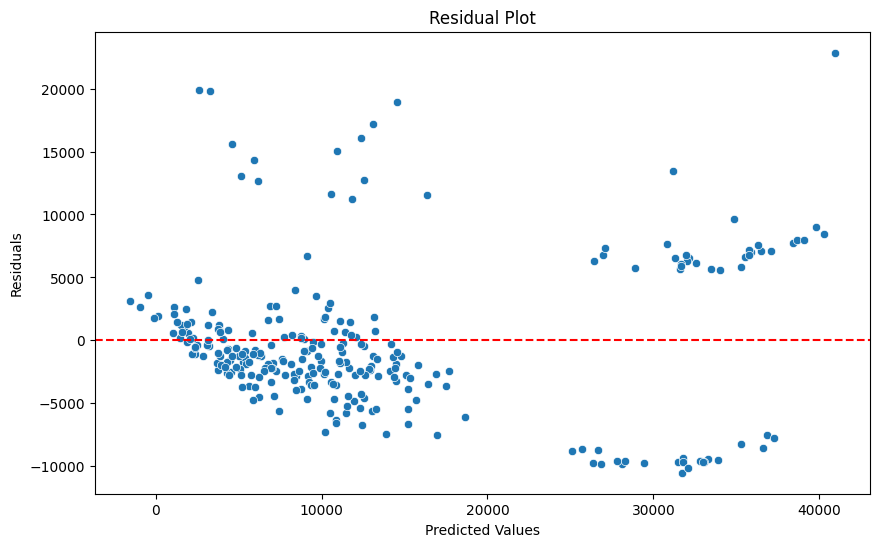

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Residual plot
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_pred, y=residuals)
plt.title('Residual Plot')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')
plt.show()



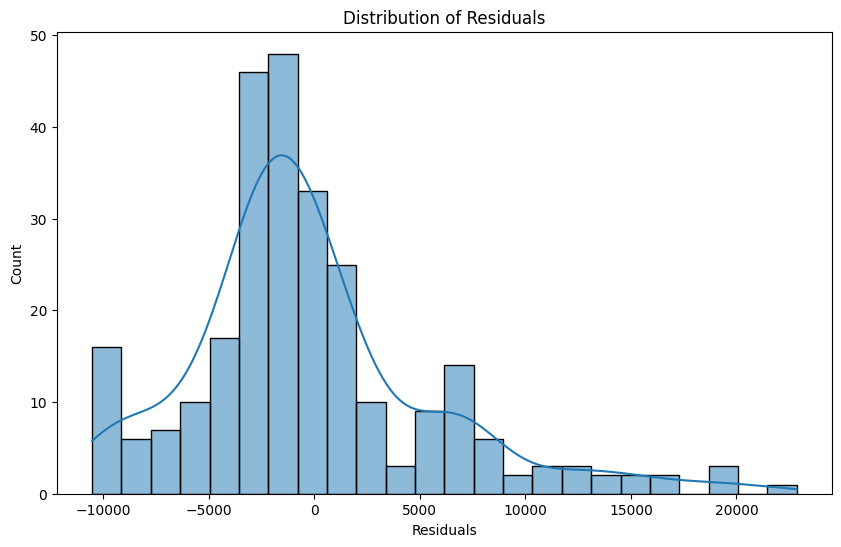

In [ ]:
# Distribution of residuals
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.show()


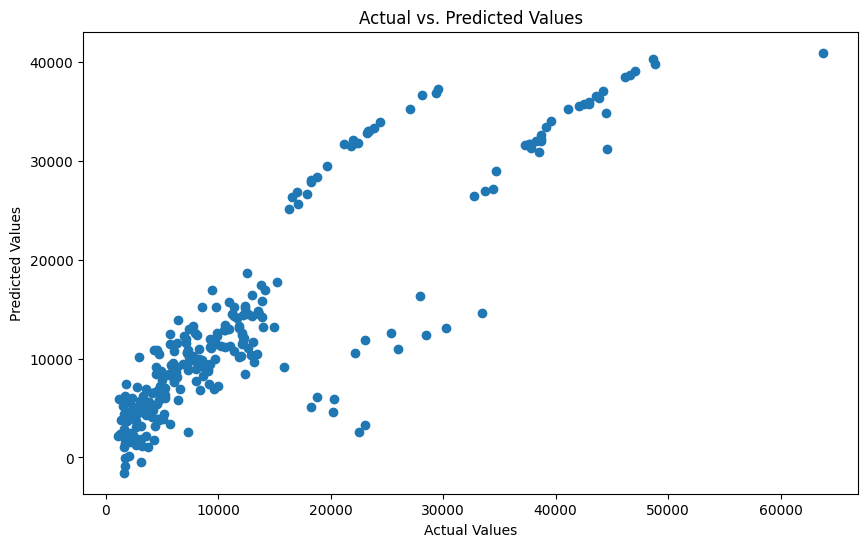

In [ ]:
# Actual vs. Predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs. Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler

# Scale the target variable
scaler_y = StandardScaler()
y_train_scaled = scaler_y.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = scaler_y.transform(y_test.values.reshape(-1, 1))

# ... (rest of the code)

# Fit the linear regression model using ordinary least squares (OLS) on the training data
model = sm.OLS(y_train_scaled, X_train_scaled).fit()

# Make predictions on the test set
y_pred_scaled = model.predict(X_test_scaled)




In [ ]:
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')


Mean Absolute Error: 4279.709799222019


In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load the data
df = pd.read_csv('insurance.csv')

# Data preprocessing
X = df[['smoker', 'age', 'bmi']]
y = df['charges']

# Convert categorical variable to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['smoker'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term to the features (required for statsmodels)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the linear regression model using ordinary least squares (OLS)
model = sm.OLS(y_train, X_train_scaled).fit()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the model summary
print(model.summary())

# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     1007.
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.65e-310
Time:                        20:36:37   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.904     71.026      0.0

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Visualize the relationship between 'smoker' and 'charges'
fig = px.scatter(df, x='age', y='charges', color='smoker', opacity=0.7,
                 title='Effect of Smoking on Health Insurance Charges',
                 labels={'charges': 'Health Insurance Charges'})
fig.update_layout(showlegend=True)
fig.show()




In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



# Data preprocessing
X = df[['region', 'age', 'bmi', 'smoker']]
y = df['charges']

# Convert categorical variables to numerical using one-hot encoding
X = pd.get_dummies(X, columns=['region', 'smoker'], drop_first=True)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Add a constant term to the features (required for statsmodels)
X_train_scaled = sm.add_constant(X_train_scaled)
X_test_scaled = sm.add_constant(X_test_scaled)

# Fit the linear regression model using ordinary least squares (OLS)
model = sm.OLS(y_train, X_train_scaled).fit()

# Make predictions on the test set
y_pred = model.predict(X_test_scaled)

# Evaluate the model
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Display the model summary
print(model.summary())

# Print evaluation metrics
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.738
Method:                 Least Squares   F-statistic:                     503.9
Date:                Tue, 14 Nov 2023   Prob (F-statistic):          1.13e-306
Time:                        20:42:47   Log-Likelihood:                -10849.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1063   BIC:                         2.175e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.335e+04    187.932     71.016      0.0

In [ ]:
import plotly.graph_objects as go
import plotly.express as px

# Visualize the relationship between 'region' and 'charges'
fig_region_charges = px.scatter(df, x='age', y='charges', color='region', opacity=0.7,
                                title='Effect of Region on Health Insurance Charges',
                                labels={'charges': 'Health Insurance Charges'})
fig_region_charges.update_layout(showlegend=True)
fig_region_charges.show()

# Visualize the predicted charges vs. actual charges by region
fig_pred_vs_actual_region = go.Figure()

for reg in df['region'].unique():
    reg_data = df[df['region'] == reg]

    X_reg = pd.get_dummies(reg_data[['age', 'bmi', 'smoker']], columns=['smoker'], drop_first=True)
    X_reg_scaled = scaler.transform(X_reg)
    X_reg_scaled = sm.add_constant(X_reg_scaled)

    y_reg_pred = model.predict(X_reg_scaled)

    fig_pred_vs_actual_region.add_trace(go.Scatter(x=reg_data.index, y=reg_data['charges'],
                                                   mode='markers', name=f'Actual Charges - {reg}'))
    fig_pred_vs_actual_region.add_trace(go.Scatter(x=reg_data.index, y=y_reg_pred,
                                                   mode='lines', name=f'Predicted Charges - {reg}'))

fig_pred_vs_actual_region.update_layout(title='Actual vs. Predicted Health Insurance Charges by Region',
                                        xaxis_title='Sample Index',
                                        yaxis_title='Health Insurance Charges')
fig_pred_vs_actual_region.show()


ValueError: ignored

In [ ]:
import plotly.express as px

# Create a violin plot for charges by region
fig_violin = px.violin(df, x='region', y='charges', box=True, points="all",
                       title='Violin Plot of Health Insurance Charges by Region',
                       labels={'charges': 'Health Insurance Charges'})
fig_violin.update_traces(meanline_visible=True)
fig_violin.show()
